In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

In [4]:
cereals = pd.read_excel("outside_data/agriculture_projections/cereals.xlsx")
meats = pd.read_excel("outside_data/agriculture_projections/meats.xlsx")
plants = pd.read_excel("outside_data/agriculture_projections/plants.xlsx")

In [5]:
cereals_tidy = pd.melt(cereals, id_vars = "Region")
meats_tidy = pd.melt(meats, id_vars = "Region")
plants_tidy = pd.melt(plants, id_vars = "Region")

In [6]:
all_merged = cereals_tidy.merge(meats_tidy, on= ["Region", "variable"]).merge(plants_tidy, on= ["Region", "variable"])
all_merged.columns = ["Region", "Variable", "Grain Production", "Meat Production", "Vegetable Production"]

In [7]:
all_merged["Year"] = all_merged["Variable"].str.extract(r'(\d+)')
all_merged["Variable"]  = all_merged["Variable"].str.replace(r'(\d+)', "").str.strip()

/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [8]:
regions = ["World", "Developing World", "Developed World", "Iran", "Iraq", "Syria", "North Africa & Middle East"]
aoi_merged = all_merged[all_merged["Region"].isin(regions)]

In [9]:
aoi_merged_tidy = pd.melt(aoi_merged, value_vars=["Grain Production", "Meat Production", "Vegetable Production"], id_vars = ["Region", "Year", "Variable"])
aoi_merged_tidy.head()
    

,Region,Year,Variable,variable,value
0,Developing World,2010,Total Production,Grain Production,1389.559545
1,Developed World,2010,Total Production,Grain Production,765.355752
2,North Africa & Middle East,2010,Total Production,Grain Production,114.453729
3,Iran,2010,Total Production,Grain Production,25.275218
4,Iraq,2010,Total Production,Grain Production,4.515117


In [10]:
overall_regions = aoi_merged_tidy[aoi_merged_tidy["Region"].isin(["Developing World", "Developed World", "North Africa & Middle East"])]


In [11]:
overall_regions_tp = overall_regions[overall_regions["Variable"] == "Total Production"]
overall_regions_tp.head()

,Region,Year,Variable,variable,value
0,Developing World,2010,Total Production,Grain Production,1389.559545
1,Developed World,2010,Total Production,Grain Production,765.355752
2,North Africa & Middle East,2010,Total Production,Grain Production,114.453729
6,Developing World,2030,Total Production,Grain Production,1826.286723
7,Developed World,2030,Total Production,Grain Production,919.555433


In [12]:
overall_regions_tp["Region"] = overall_regions_tp["Region"].str.cat(overall_regions_tp["variable"], sep =", ") 




/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## No Climate Change Total Production

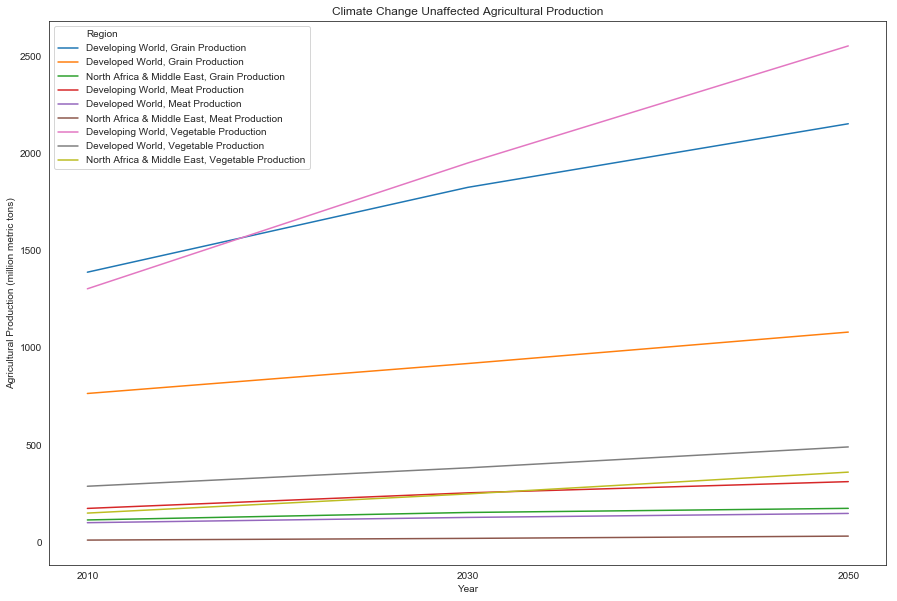

In [95]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data =overall_regions_tp, hue="Region")
plt.title("Climate Change Unaffected Agricultural Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('total_production_no_cc.png')

## Climate Change Total Production

In [14]:
overall_regions_tp_cc = overall_regions[overall_regions["Variable"] == "Total Production CC"]

In [15]:

overall_regions_tp_cc["Region"] = overall_regions_tp_cc["Region"].str.cat(overall_regions_tp_cc["variable"], sep =", ") 

overall_regions_tp_cc = overall_regions_tp_cc.drop("variable", axis=1)


/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


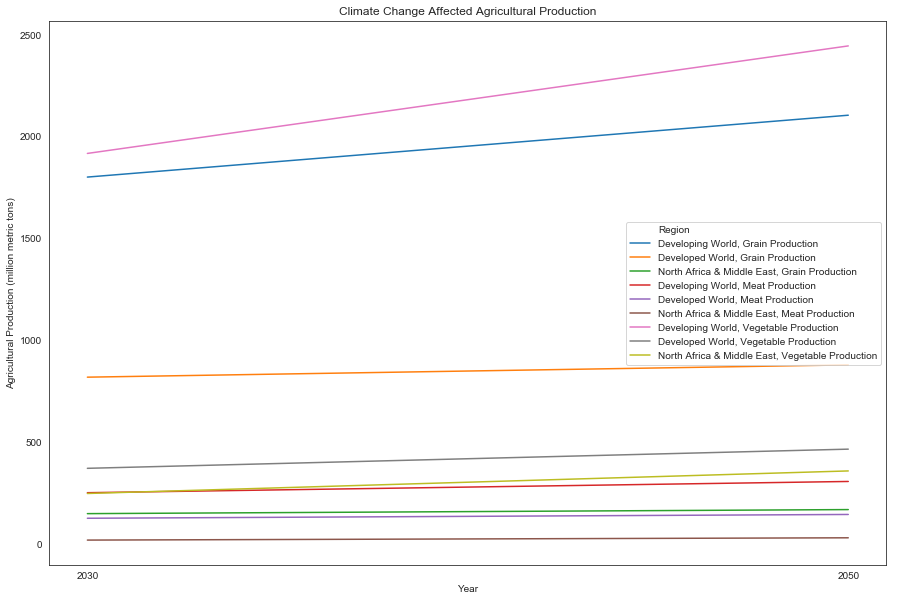

In [97]:
plt.figure(figsize=(15, 10))
sns.lineplot(x= "Year", y="value", data = overall_regions_tp_cc, hue="Region")
plt.title("Climate Change Affected Agricultural Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('total_production_cc.png')

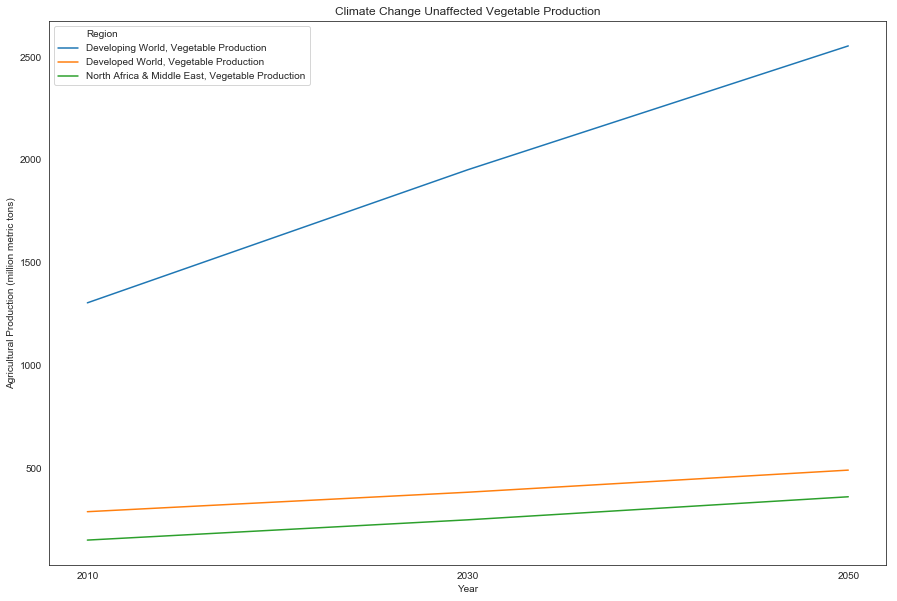

In [21]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_tp[overall_regions_tp["Region"].isin(["Developing World, Vegetable Production", "Developed World, Vegetable Production", "North Africa & Middle East, Vegetable Production"])], hue="Region")

plt.title("Climate Change Unaffected Vegetable Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('total_vegetable_no_cc.png')



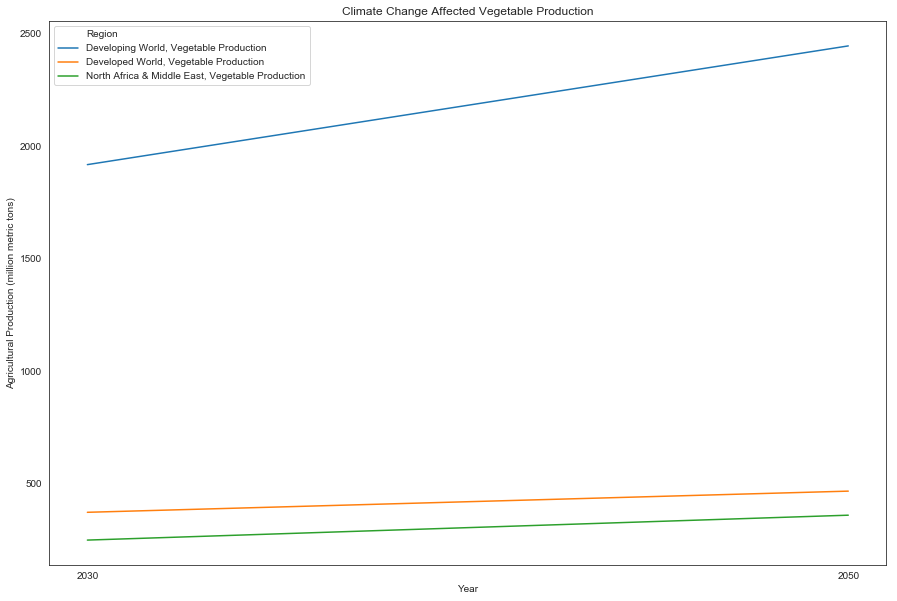

In [22]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_tp_cc[overall_regions_tp_cc["Region"].isin(["Developing World, Vegetable Production", "Developed World, Vegetable Production", "North Africa & Middle East, Vegetable Production"])], hue="Region")

plt.title("Climate Change Affected Vegetable Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('total_vegetable_cc.png')



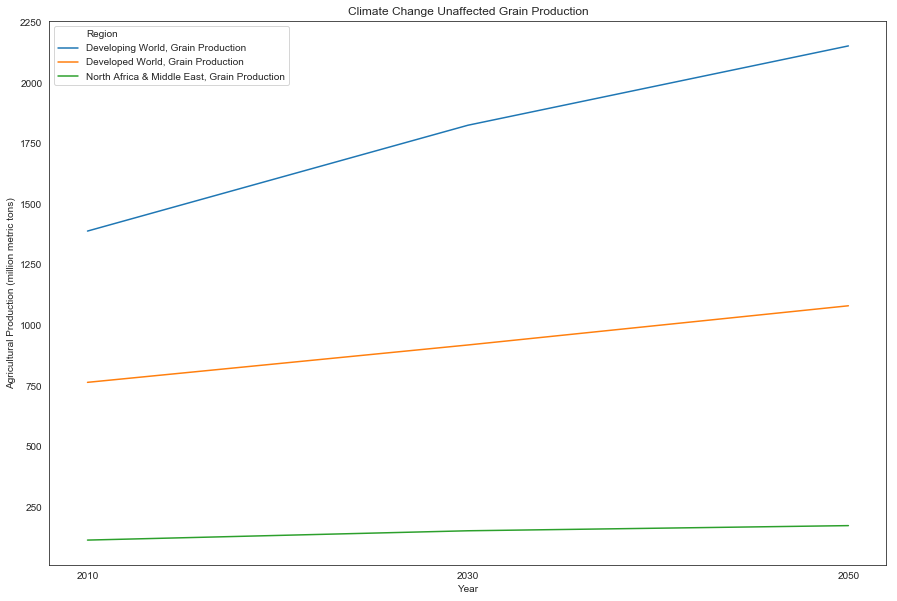

In [23]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_tp[overall_regions_tp["Region"].isin(["Developing World, Grain Production", "Developed World, Grain Production", "North Africa & Middle East, Grain Production"])], hue="Region")

plt.title("Climate Change Unaffected Grain Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('total_grain_no_cc.png')



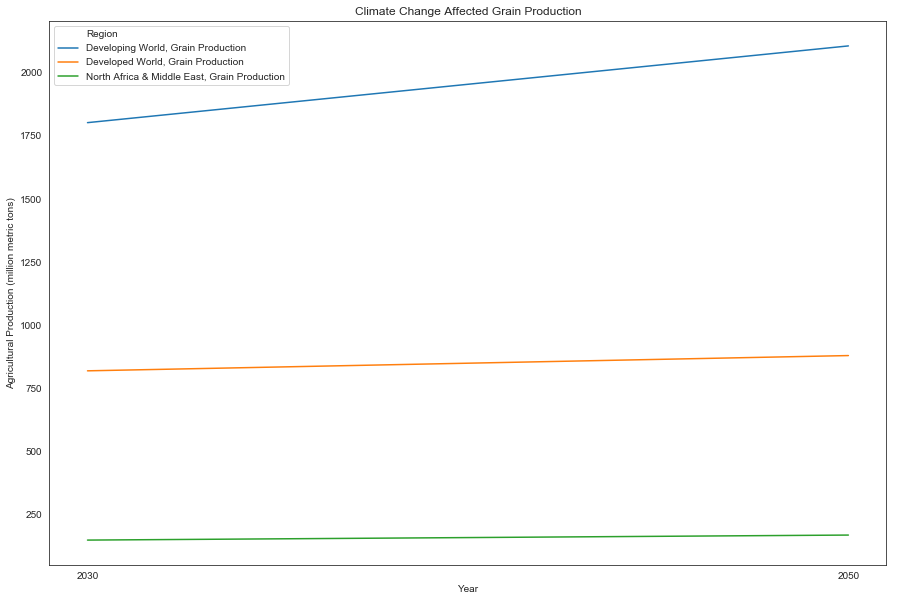

In [49]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_tp_cc[overall_regions_tp_cc["Region"].isin(["Developing World, Grain Production", "Developed World, Grain Production", "North Africa & Middle East, Grain Production"])], hue="Region")

plt.title("Climate Change Affected Grain Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('total_grain_cc.png')



## Per Capita Production No Climate Change

In [35]:
overall_regions_pc = overall_regions[overall_regions["Variable"] == "Per Capita"]

In [37]:
overall_regions_pc["Region"] = overall_regions_pc["Region"].str.cat(overall_regions_pc["variable"], sep =", ") 

overall_regions_pc = overall_regions_pc.drop(["variable", "Variable"], axis=1)


/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


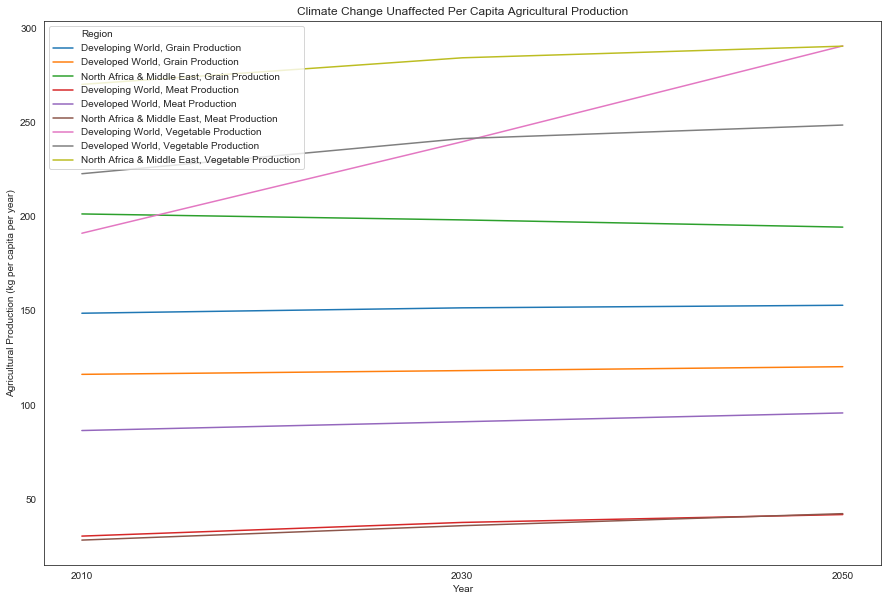

In [43]:
plt.figure(figsize=(15, 10))
sns.lineplot(x= "Year", y="value", data = overall_regions_pc, hue="Region")
plt.title("Climate Change Unaffected Per Capita Agricultural Production")
plt.ylabel("Agricultural Production (kg per capita per year)")
plt.savefig('per_capita_production_no_cc.png')

# Climate Change Affected

/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


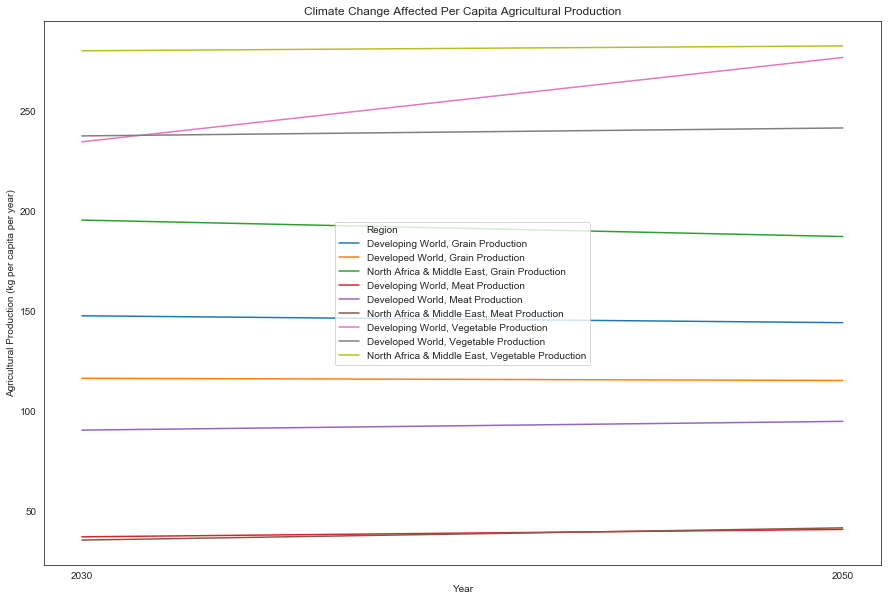

In [44]:
overall_regions_pc_cc = overall_regions[overall_regions["Variable"] == "Per Capita CC"]

overall_regions_pc_cc["Region"] = overall_regions_pc_cc["Region"].str.cat(overall_regions_pc_cc["variable"], sep =", ") 

overall_regions_pc_cc = overall_regions_pc_cc.drop(["Variable", "variable"], axis=1)


plt.figure(figsize=(15, 10))
sns.lineplot(x= "Year", y="value", data = overall_regions_pc_cc, hue="Region")
plt.title("Climate Change Affected Per Capita Agricultural Production")
plt.ylabel("Agricultural Production (kg per capita per year)")
plt.savefig('per_capita_production_cc.png')

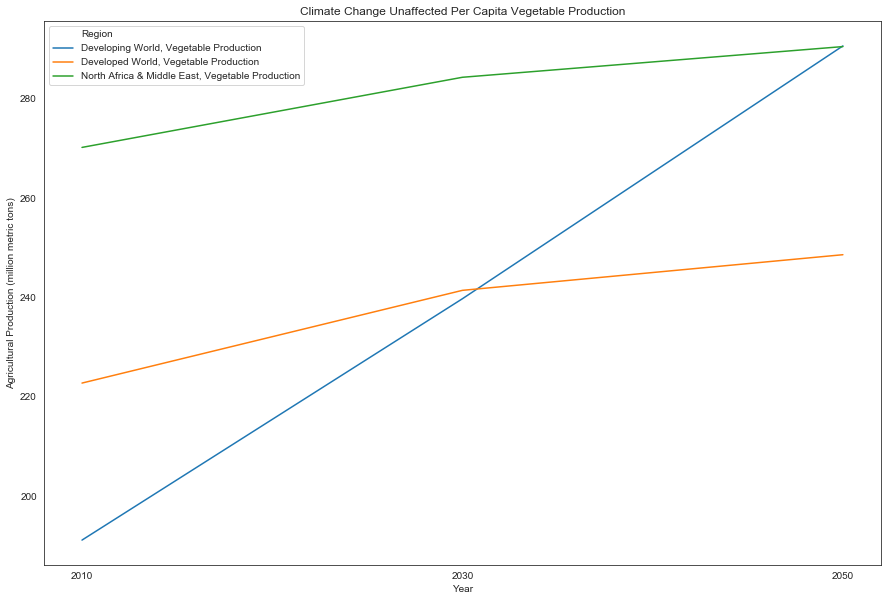

In [55]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_pc[overall_regions_pc["Region"].isin(["Developing World, Vegetable Production", "Developed World, Vegetable Production", "North Africa & Middle East, Vegetable Production"])], hue="Region")

plt.title("Climate Change Unaffected Per Capita Vegetable Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('per_capita_vegetable_no_cc.png')



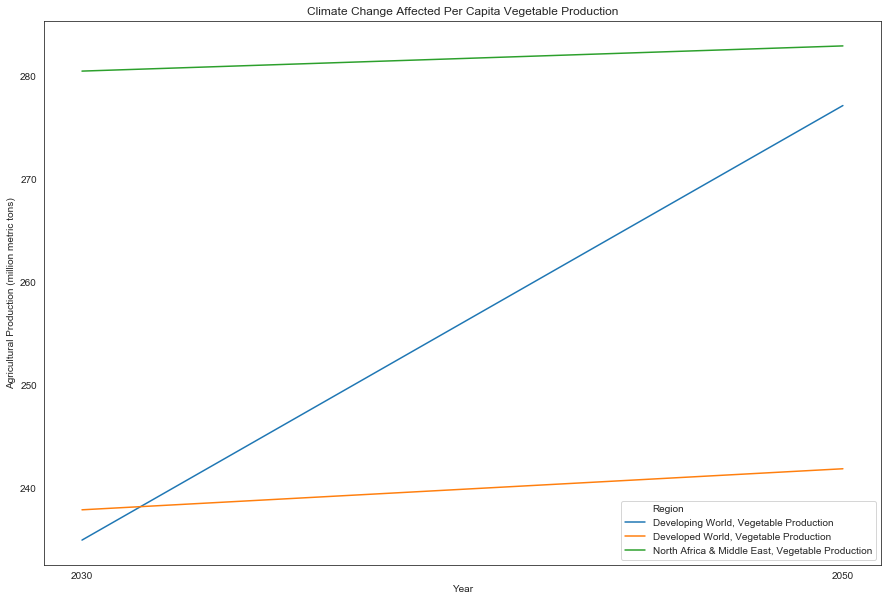

In [56]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_pc_cc[overall_regions_pc_cc["Region"].isin(["Developing World, Vegetable Production", "Developed World, Vegetable Production", "North Africa & Middle East, Vegetable Production"])], hue="Region")

plt.title("Climate Change Affected Per Capita Vegetable Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('per_capita_vegetable_cc.png')



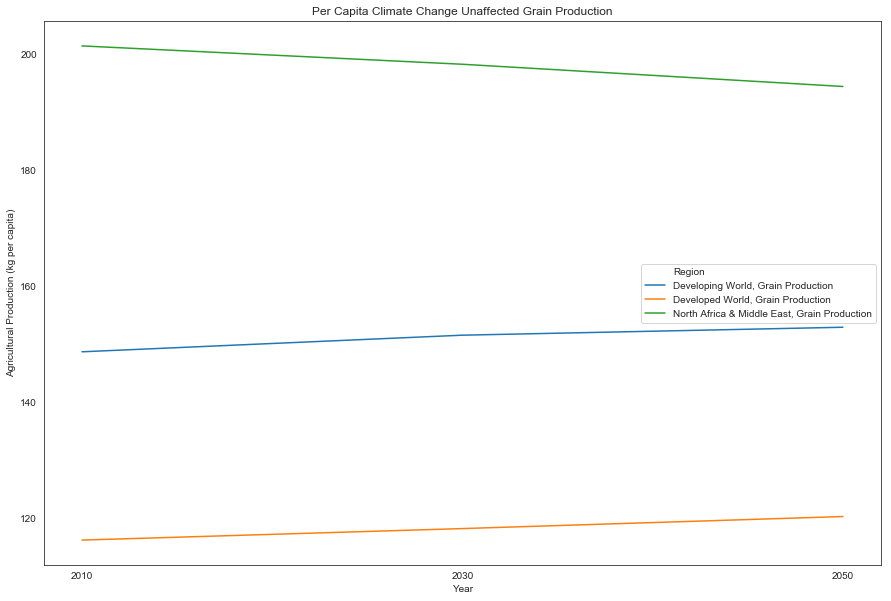

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_pc[overall_regions_pc["Region"].isin(["Developing World, Grain Production", "Developed World, Grain Production", "North Africa & Middle East, Grain Production"])], hue="Region")

plt.title("Per Capita Climate Change Unaffected Grain Production")
plt.ylabel("Agricultural Production (kg per capita)")
plt.savefig('per_capita_grain_no_cc.png')



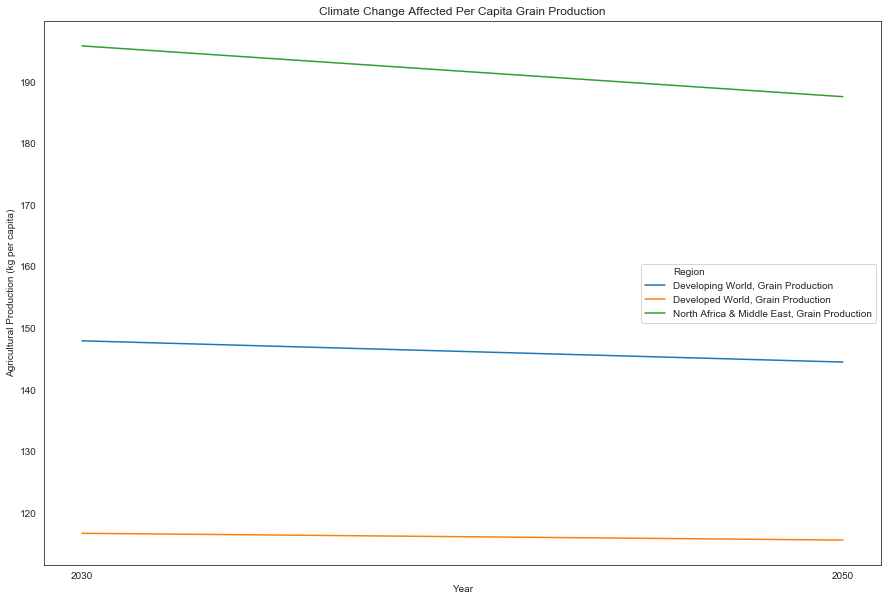

In [57]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_pc_cc[overall_regions_pc_cc["Region"].isin(["Developing World, Grain Production", "Developed World, Grain Production", "North Africa & Middle East, Grain Production"])], hue="Region")

plt.title("Climate Change Affected Per Capita Grain Production")
plt.ylabel("Agricultural Production (kg per capita)")
plt.savefig('per_capita_grain_cc.png')



# Net Trade

/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


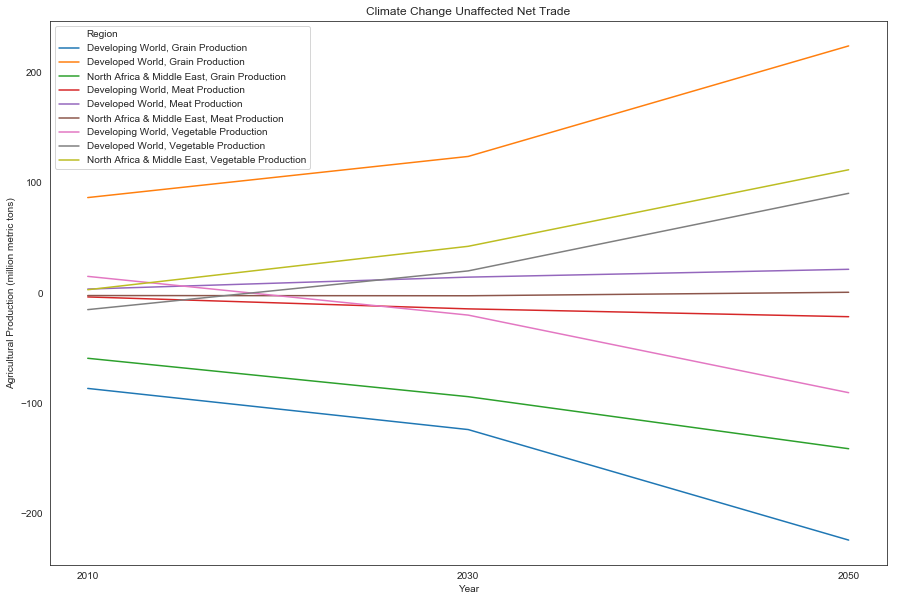

In [98]:
overall_regions_nt = overall_regions[overall_regions["Variable"] == "Net Trade"]


overall_regions_nt["Region"] = overall_regions_nt["Region"].str.cat(overall_regions_nt["variable"], sep =", ") 

overall_regions_nt= overall_regions_nt.drop("variable", axis=1)

plt.figure(figsize=(15, 10))
sns.lineplot(x= "Year", y="value", data = overall_regions_nt, hue="Region")
plt.title("Climate Change Unaffected Net Trade")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('net_trade_no_cc.png')

In [72]:
overall_regions_nt_cc = overall_regions[overall_regions["Variable"] == "Net Trade  CC"]


overall_regions_nt_cc["Region"] = overall_regions_nt_cc["Region"].str.cat(overall_regions_nt_cc["variable"], sep =", ") 

overall_regions_nt_cc= overall_regions_nt_cc.drop("variable", axis=1)

/Users/oscarsyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


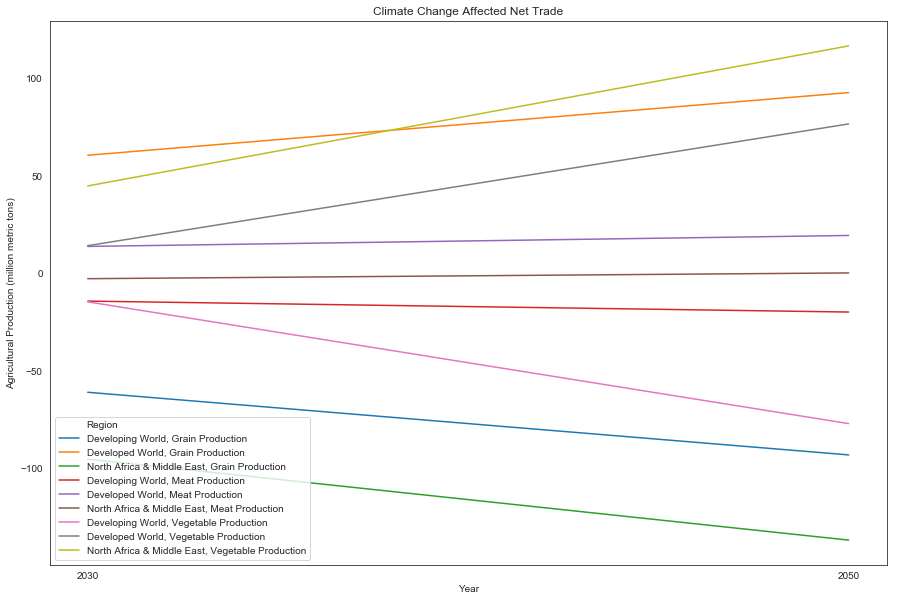

In [99]:
plt.figure(figsize=(15, 10))
sns.lineplot(x= "Year", y="value", data = overall_regions_nt_cc, hue="Region")
plt.title("Climate Change Affected Net Trade")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('net_trade_cc.png')

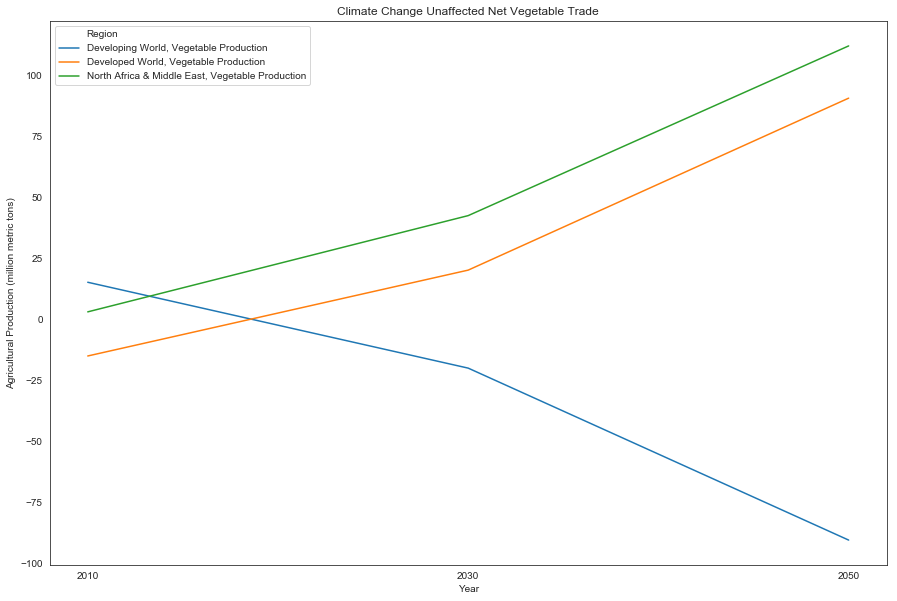

In [65]:


plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_nt[overall_regions_nt["Region"].isin(["Developing World, Vegetable Production", "Developed World, Vegetable Production", "North Africa & Middle East, Vegetable Production"])], hue="Region")

plt.title("Climate Change Unaffected Net Vegetable Trade")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('net_trade_vegetable_no_cc.png')



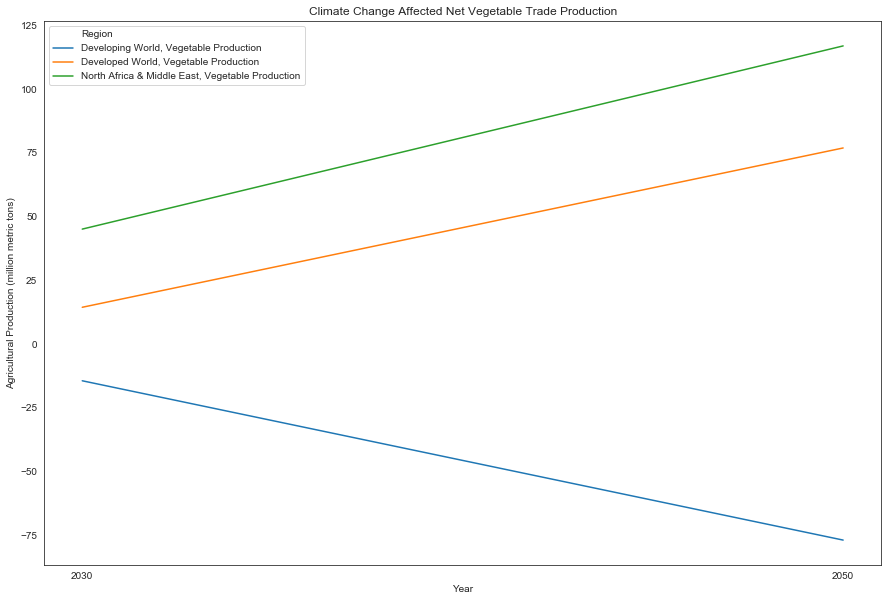

In [73]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_nt_cc[overall_regions_nt_cc["Region"].isin(["Developing World, Vegetable Production", "Developed World, Vegetable Production", "North Africa & Middle East, Vegetable Production"])], hue="Region")

plt.title("Climate Change Affected Net Vegetable Trade Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('net_trade_vegetable_nt_cc.png')



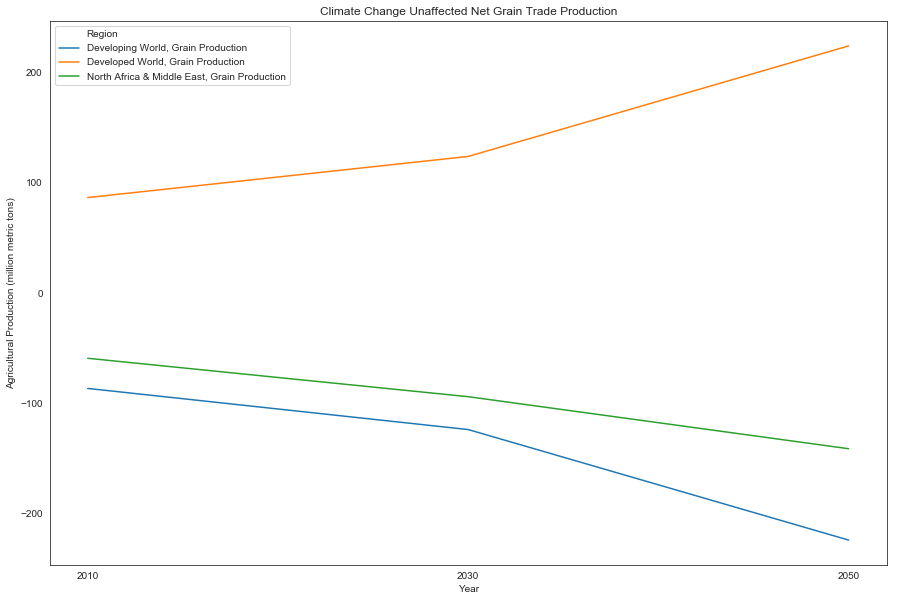

In [83]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_nt[overall_regions_nt["Region"].isin(["Developing World, Grain Production", "Developed World, Grain Production", "North Africa & Middle East, Grain Production"])], hue="Region")

plt.title("Climate Change Unaffected Net Grain Trade Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('net_trade_grain_nt.png')



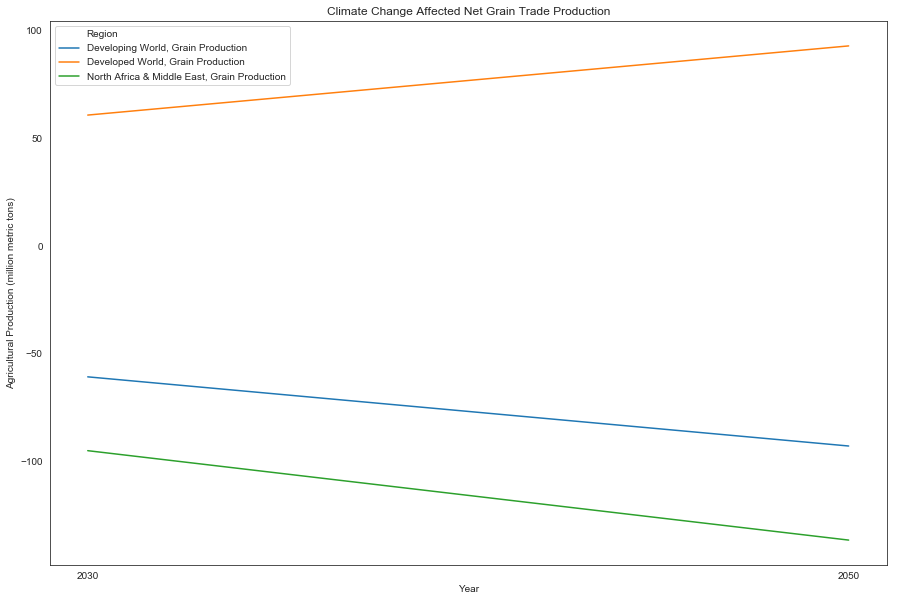

In [82]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data = overall_regions_nt_cc[overall_regions_nt_cc["Region"].isin(["Developing World, Grain Production", "Developed World, Grain Production", "North Africa & Middle East, Grain Production"])], hue="Region")

plt.title("Climate Change Affected Net Grain Trade Production")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('net_trade_grain_nt_cc.png')



# Syria and Iraq

In [76]:
def data_prep(tbl, var1, var2):
    tbl_int = tbl[tbl["Variable"].isin([var1, var2])]
    tbl_int = pd.melt(tbl_int, value_vars=["Grain Production", "Meat Production", "Vegetable Production"], id_vars = ["Region", "Year", "Variable"])
    tbl_int["Variable"] = tbl_int["Variable"].str.cat(tbl_int["variable"], sep=", ")
    return tbl_int.drop("variable", axis=1)


In [77]:
iraq_split = aoi_merged[aoi_merged["Region"] == "Iraq"]
syria_split = aoi_merged[aoi_merged["Region"] == "Syria"]
middle_east_split = aoi_merged[aoi_merged["Region"] == "North Africa & Middle East"]

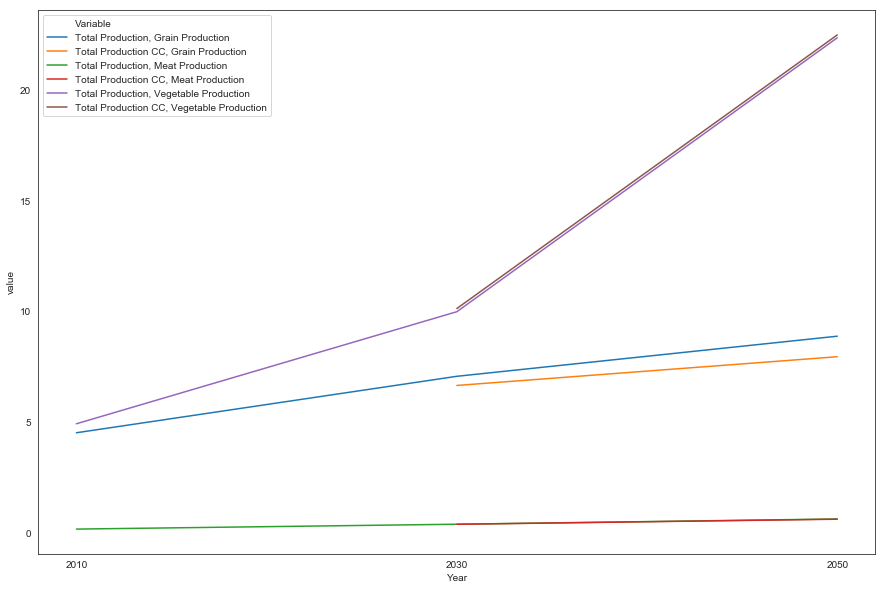

In [78]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data=data_prep(iraq_split, "Total Production", "Total Production CC"), hue="Variable")

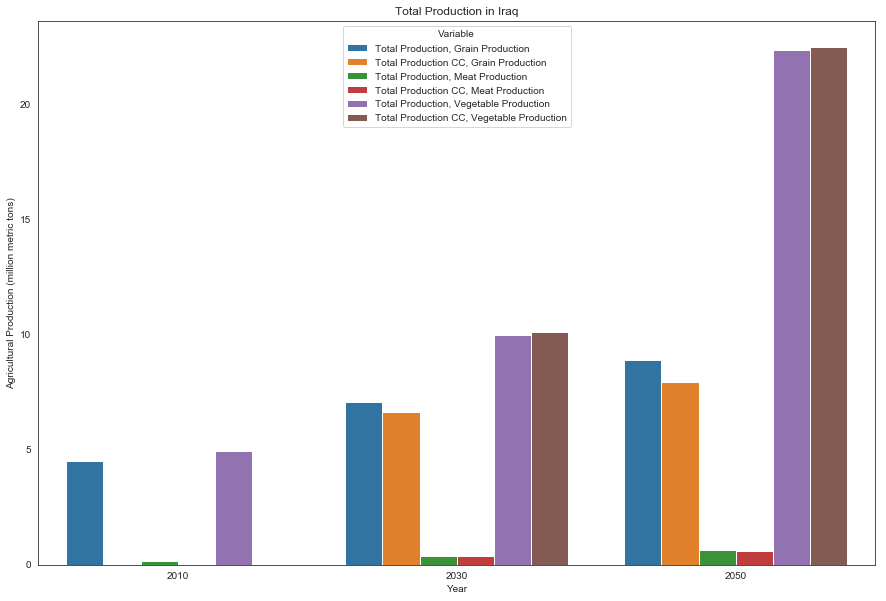

In [122]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="value", data=data_prep(iraq_split, "Total Production", "Total Production CC"), hue="Variable")
plt.title("Total Production in Iraq")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('tot_pop_iraq.png')

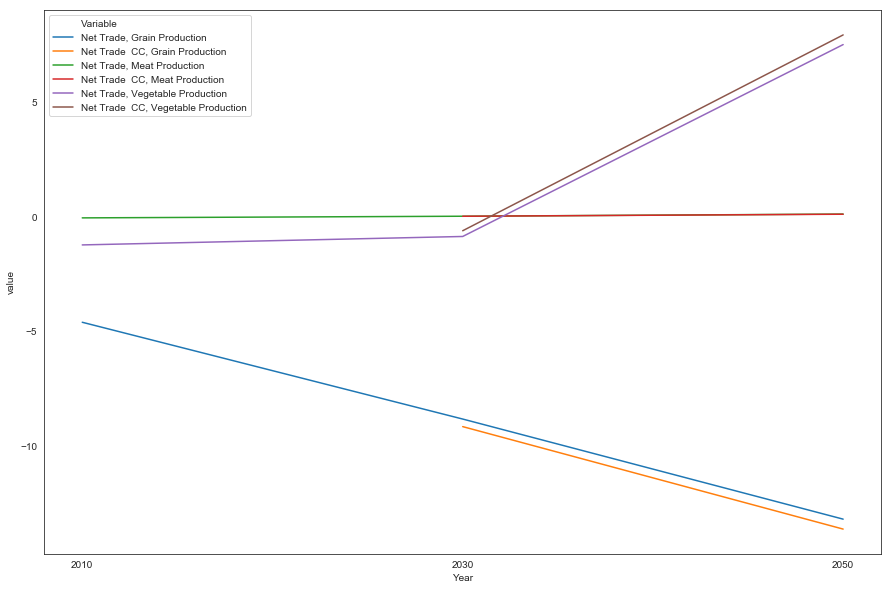

In [102]:
#net trade
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data=data_prep(iraq_split, "Net Trade", "Net Trade  CC"), hue="Variable")

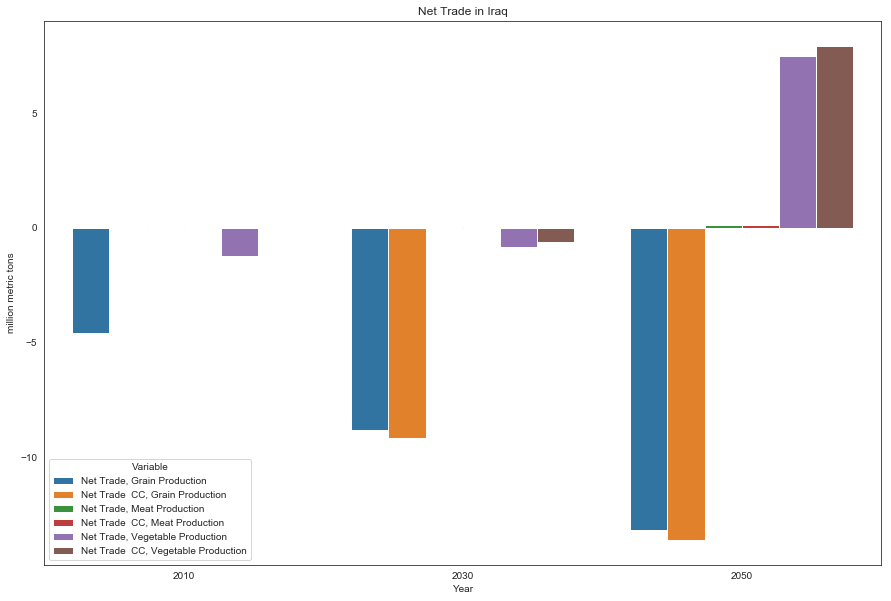

In [125]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="value", data=data_prep(iraq_split, "Net Trade", "Net Trade  CC"), hue="Variable")
plt.title("Net Trade in Iraq")
plt.ylabel("million metric tons")
plt.savefig('net_trade_iraq.png')

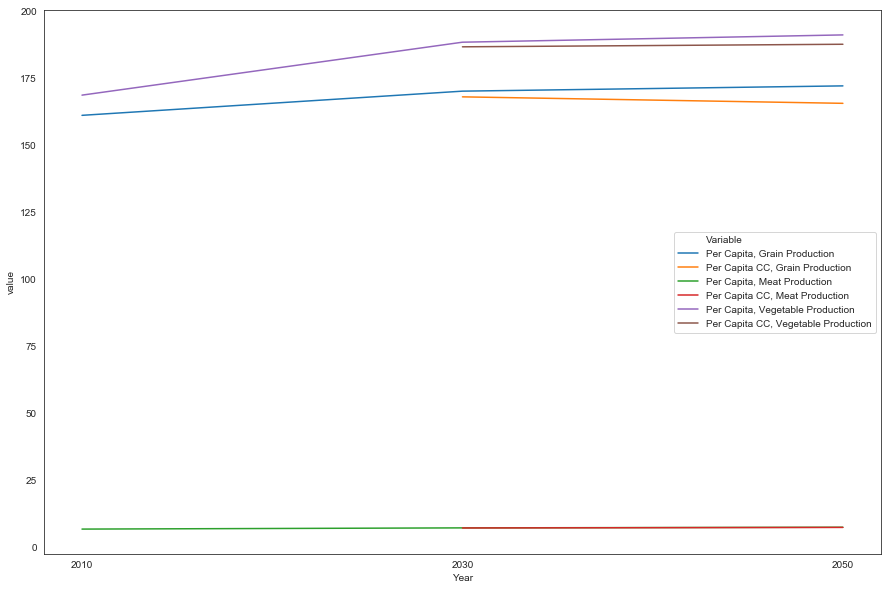

In [86]:

plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data=data_prep(iraq_split, "Per Capita", "Per Capita CC"), hue="Variable")

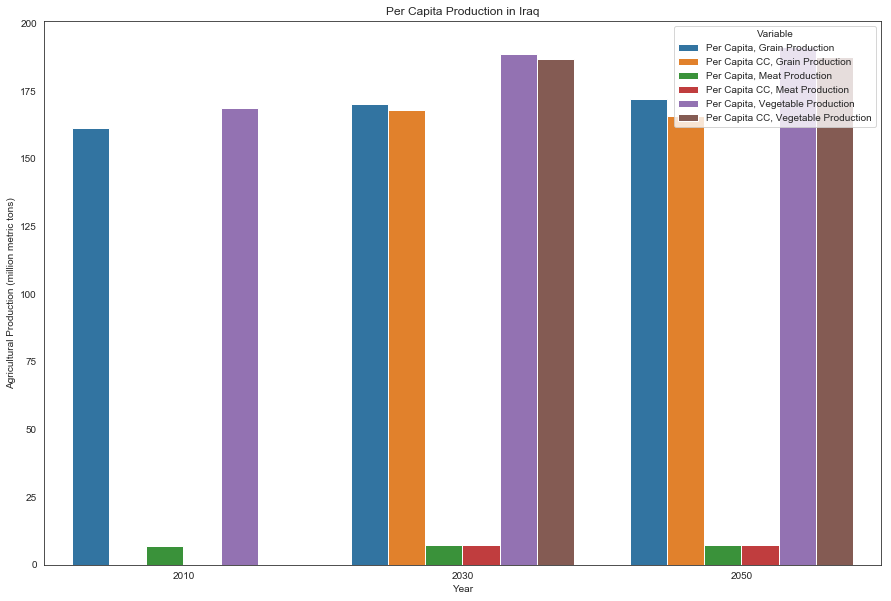

In [120]:

plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="value", data=data_prep(iraq_split, "Per Capita", "Per Capita CC"), hue="Variable")
plt.title("Per Capita Production in Iraq")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('per_cap_iraq.png')

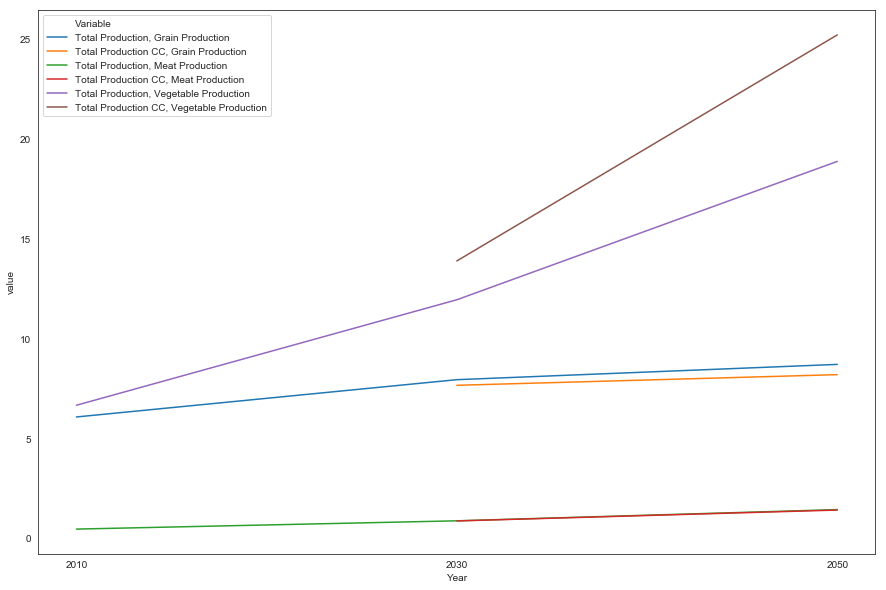

In [89]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data=data_prep(syria_split, "Total Production", "Total Production CC"), hue="Variable")

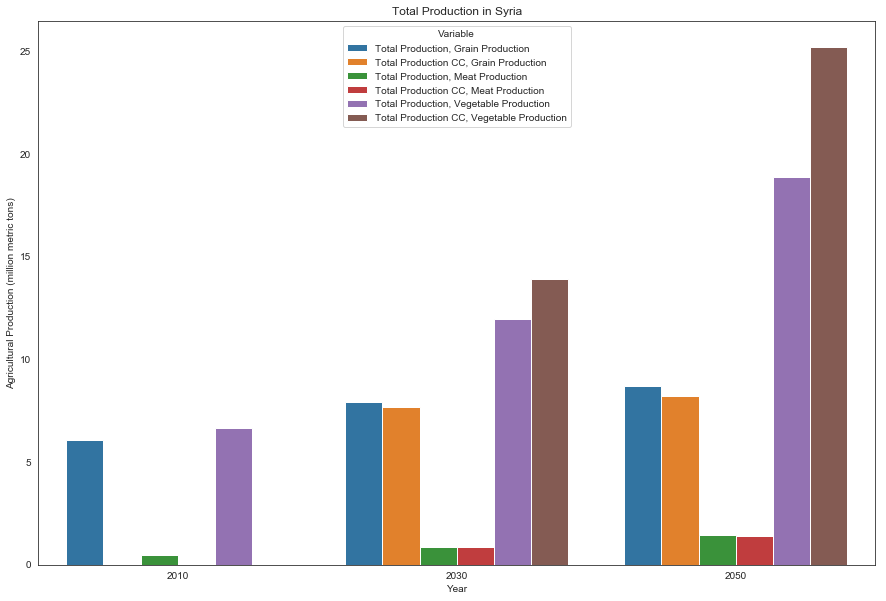

In [119]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="value", data=data_prep(syria_split, "Total Production", "Total Production CC"), hue="Variable")
plt.title("Total Production in Syria")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('tot_prod_syria.png')


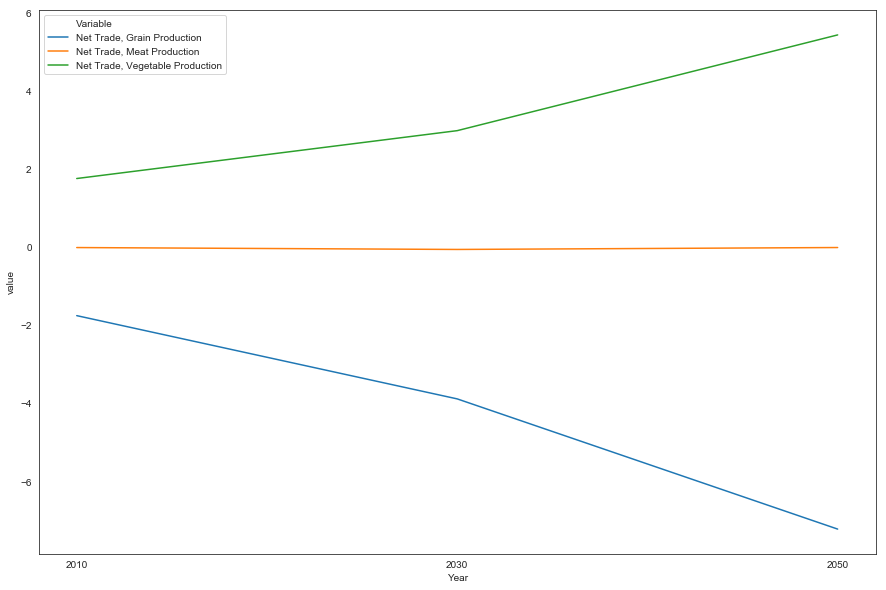

In [90]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data=data_prep(syria_split, "Net Trade", "Net Trade . CC"), hue="Variable")

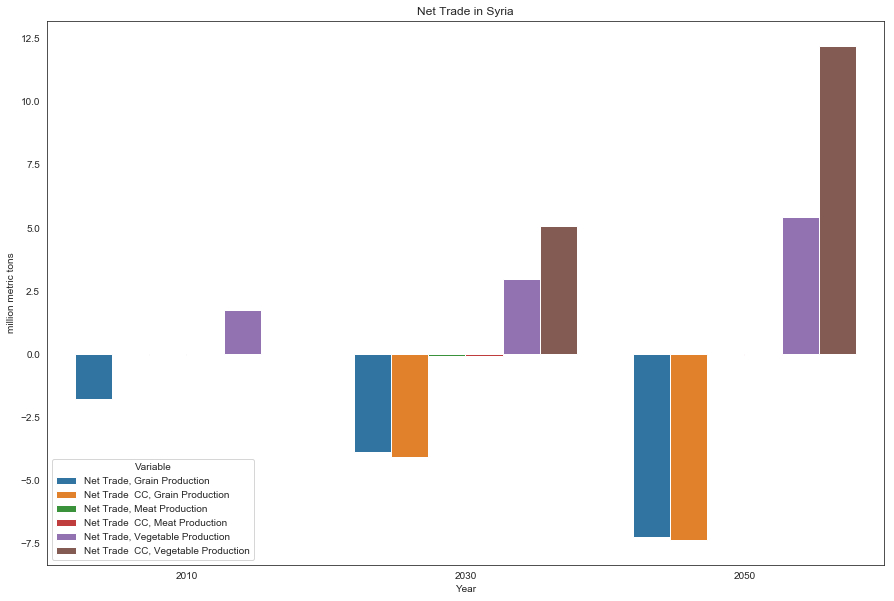

In [126]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="value", data=data_prep(syria_split, "Net Trade", "Net Trade  CC"), hue="Variable")
plt.title("Net Trade in Syria")
plt.ylabel("million metric tons")
plt.savefig('net_trade_syria.png')

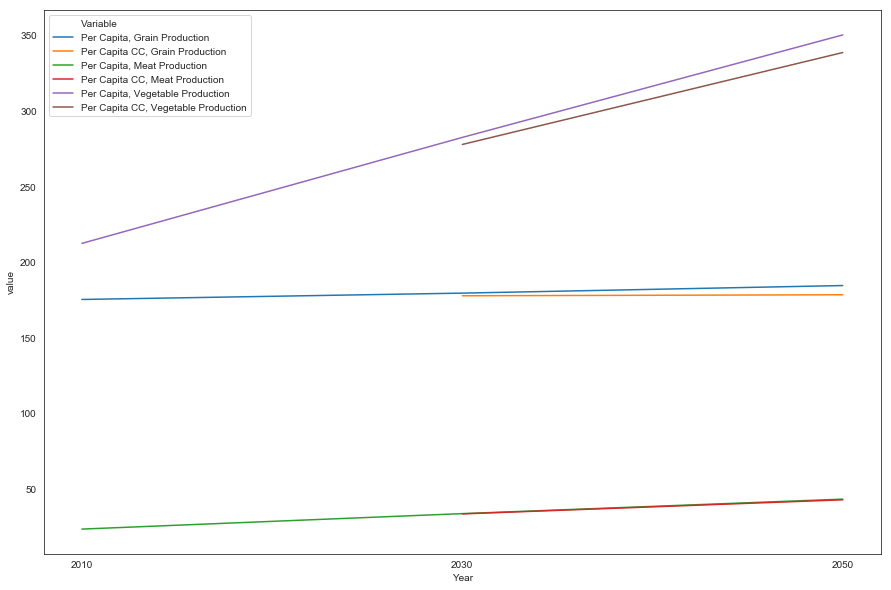

In [92]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="value", data=data_prep(syria_split, "Per Capita", "Per Capita CC"), hue="Variable")

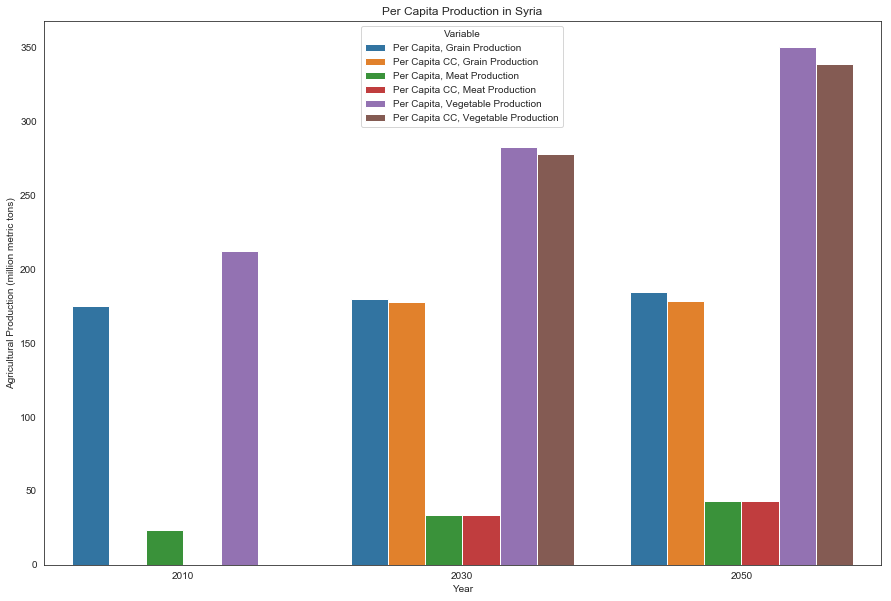

In [117]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="value", data=data_prep(syria_split, "Per Capita", "Per Capita CC"), hue="Variable")
plt.title("Per Capita Production in Syria")
plt.ylabel("Agricultural Production (million metric tons)")
plt.savefig('per_capita_syria.png')